In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math

from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data
df_cars = pd.read_csv(("/content/drive/My Drive/car_prices.csv"), on_bad_lines='skip')
df_cars.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
485693,2014,Ford,Edge,Limited,suv,automatic,2fmdk4kc3eba54856,mo,4.0,33369.0,black,black,ars/avis budget group,23100,22900,Wed Jun 03 2015 03:00:00 GMT-0700 (PDT)
303076,2010,Toyota,Corolla,Base,Sedan,NaN,2t1bu4ee3ac194653,ab,3.2,95553.0,white,beige,1582529 alberta ltd,6800,7600,Thu Feb 26 2015 03:30:00 GMT-0800 (PST)
94810,2002,Volkswagen,Passat,GLX 4Motion,Wagon,automatic,wvwyh63bx2e412413,wa,2.7,139923.0,green,black,toyota of kirkland,1575,2000,Wed Jan 07 2015 13:20:00 GMT-0800 (PST)
516398,2013,Nissan,Rogue,SV,suv,automatic,jn8as5mv4dw106783,nj,4.3,15199.0,white,black,nissan-infiniti lt,18750,20000,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
409434,2013,Ford,Focus,SE,Sedan,automatic,1fadp3f22dl213257,az,3.2,52030.0,silver,black,the hertz corporation,9250,9000,Thu May 21 2015 05:30:00 GMT-0700 (PDT)


# Exploratory Data Analysis (EDA)

---



## 1. Descriptive Statistics

In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Dari df_cars.info diatas, kita dapat mengetahui tipe data dari tiap fiturnya dan juga dapat diketahui pula jumlah data dari tiap fitur.
Di dalam df_cars.info juga dapat dilihat jumlah nilai yang berbeda, hal ini dapat disebabkan karena nilai kosong atau missing value.


In [ ]:
df_cars.describe(include="all")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558811.000000,548510,548412,548160,545616,493458,558811,558811,547017.000000,558717.000000,558062,558062,558811,558811.000000,558811.000000,558811
unique,NaN,96,973,1975,86,2,550296,38,NaN,NaN,20,17,14264,NaN,NaN,3745
top,NaN,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475914,5,82945,NaN,NaN,110970,244325,19693,NaN,NaN,5334
mean,2010.038696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424512,68323.195797,NaN,NaN,NaN,13769.324646,13611.262461,NaN
std,3.966812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.949439,53397.752933,NaN,NaN,NaN,9679.874607,9749.656919,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,28374.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,52256.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,99112.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**

Untuk kolom **saledate** sebaiknya diubah menjadi tipe data datetime untuk kemudahan pengelolaan data waktu.<br>
selebihnya semua tipe data sudah sesuai.

In [ ]:
df_cars['saledate'] = pd.to_datetime(df_cars['saledate'], utc=True)

In [ ]:
print(df_cars['saledate'].dtypes)

datetime64[ns, UTC]


**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

In [ ]:
# Hitung jumlah nilai null dalam setiap kolom
jumlah_null = df_cars.isnull().sum()

# Hitung rasio nilai null terhadap total jumlah baris dalam dataset
rasio_null = (jumlah_null / len(df_cars)) * 100

# Buat DataFrame baru untuk menampilkan kolom-kolom yang memiliki nilai null dan rasio nullnya
df_cars_info = pd.DataFrame({
    'Jumlah Null': jumlah_null,
    'Rasio Null (%)': rasio_null
})
print(df_cars_info)

              Jumlah Null  Rasio Null (%)
year                    0        0.000000
make                10301        1.843378
model               10399        1.860915
trim                10651        1.906011
body                13195        2.361263
transmission        65353       11.695010
vin                     0        0.000000
state                   0        0.000000
condition           11794        2.110553
odometer               94        0.016821
color                 749        0.134035
interior              749        0.134035
seller                  0        0.000000
mmr                     0        0.000000
sellingprice            0        0.000000
saledate                0        0.000000


Terdapat kolom yang memiliki missing value, antara lain:
 - make
 - model
 - trim
 - body
 - transmission
 - vin
 - condition
 - odometer
 - color
 - interior

kolom yang memiliki missing value terbanyak ada di kolom transmisson


**C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)**

In [ ]:
df_cars.describe(include=[np.number])

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df_cars.describe(exclude=[np.number])

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,2015-02-09 17:30:00+00:00
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 01:15:00+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-20 19:30:00+00:00


Kelompok numerik:<br>
- Tidak ada masalah pada kolom condition
- Perbandingan nilai mean dengan median sebagian kolom memiliki selisih yang cukup tinggi. Hal ini menjadi indikasi kemungkinan terdapat nilai outlier pada sebagian kolom
- Adanya anomali pada nilai minimum sellingprice
- Adanya anomali pada nilai maksimum odometer

Kelompok kategorik:<br>
- Kolom transmission didominasi oleh mobil dengan transmisi automatic (lebih dari 50%)
- Kolom color dan interior didominasi oleh mobil dengan warna exterior dan interior black
- Kolom make didominasi oleh mobil dengan merk Ford
- Kolom body didominasi oleh mobil dengan jenis Sedan

Hal yang harus diperhatikan saat data pre-processing:
- Standarisasi penulisan value masing-masing kolom kategorik
- Handling missing value pada kolom yang memiliki nilai NaN, null atau -
- Handling outliers untuk kolom odometer dan sellingprice

## 2. Univariate Analysis

In [ ]:
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

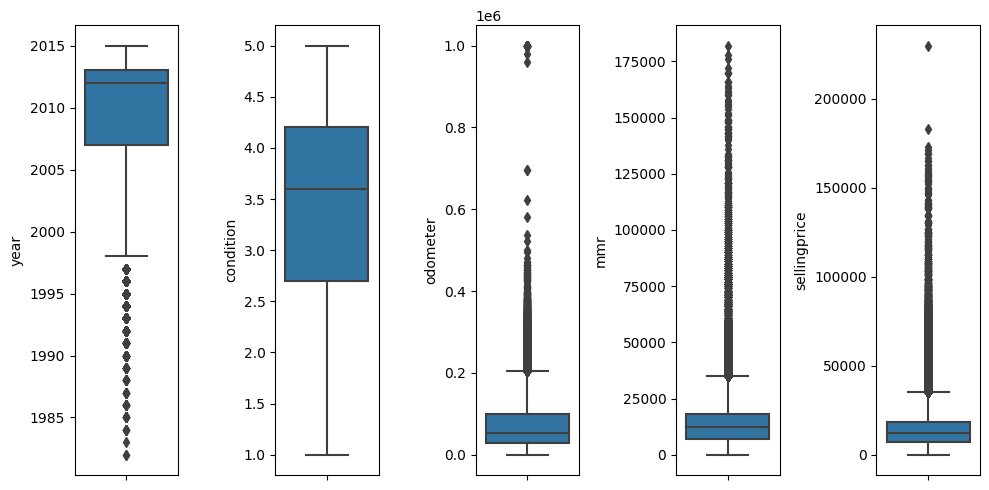

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0,len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df_cars[nums[i]])
    plt.tight_layout()

Dari gambar boxplot didapat bahwa column condition tidak memiliki outlier dan distribusinya cenderung negative skewed. Untuk column lain yaitu odometer,mmr dan sellingprice banyak outlier yang terletak di nilai yang lebih besar (positive skewed). Serta dari function detect outlier bisa melihat banyaknya outlier. Oleh karena itu pada data preprocessing dan cleaning, bisa dilakukan penghapusan outlier dengan metode quantile IQR maupun menggunakan log transformation untuk mengatasi positive skewed


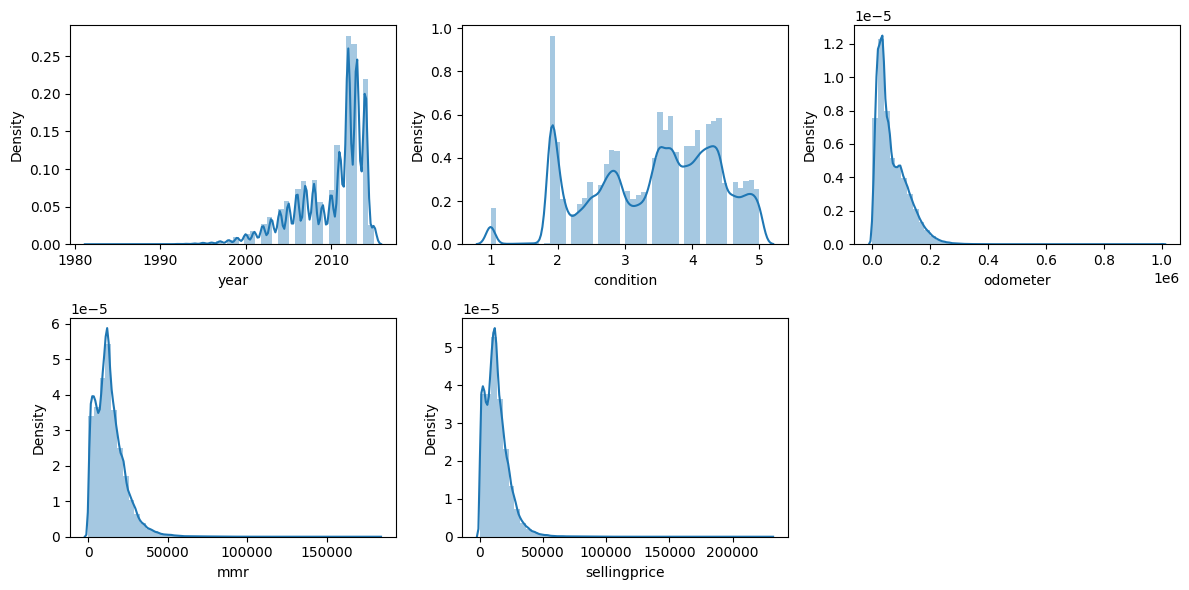

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df_cars[nums[i]])
    plt.tight_layout()

- Dari distribution plot terlihat untuk feature odometer, selling price, serta mmr memiliki distribusi yang positif (positively skewed) dimana nilai outlier cukup jauh ke kanan atau berada di nilai yang besar. sedangkan umumnya data fitur tersebar nilai yang cukup rendah.
- Target memiliki kemiringan yang positif dimana nilai outliernya pun berada pada nilai yang besar
- Fitur condition perlu diperhatikan dikarenakan memiliki skala ordinal pada distribution plot
- Fitur tahun memiliki distribusi kemiringan negatif, yang dimana data/transaksi terjadi cukup benyak >2010

## 3. Multivariate Analysis

<Axes: >

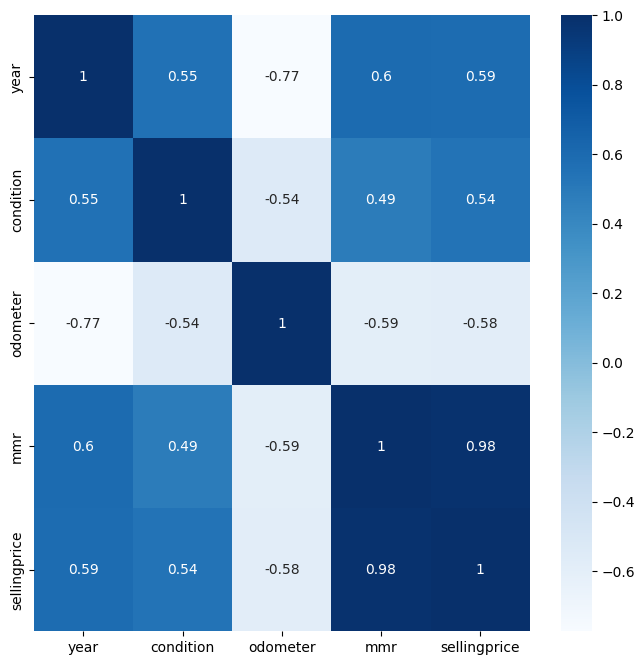

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_cars.corr(), cmap='Blues', annot=True)

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**

- MMR (Manheim Market Report): MMR memiliki korelasi positif yang cukup tinggi dengan harga jual (Selling Price). Hal ini menunjukkan bahwa MMR adalah prediktor yang signifikan untuk harga jual kendaraan. Feature ini harus dipertahankan. <br>
- Year (Tahun Produksi): Year juga memiliki korelasi positif yang cukup kuat dengan harga jual, menunjukkan bahwa tahun produksi kendaraan berpengaruh pada harga jualnya. Feature ini juga relevan dan harus dipertahankan.<br>
- Odometer (Jarak Tempuh): Odometer memiliki korelasi negatif yang moderat dengan harga jual. Semakin rendah nilai odometer, harga jual cenderung lebih tinggi. Ini adalah indikasi yang baik bahwa feature ini relevan dan harus dipertahankan.<br>
- Condition (Kondisi Kendaraan): Condition memiliki korelasi positif yang moderat dengan harga jual. Semakin baik kondisi kendaraan, harga jualnya cenderung lebih tinggi. Feature ini juga penting dan harus dipertahankan.


**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perludilakukan terhadap feature itu?**

- MMR vs. Year: Terdapat kemungkinan bahwa kendaraan dengan MMR tinggi cenderung diproduksi pada tahun yang lebih baru. Pola ini bisa dijelajahi lebih lanjut untuk memahami hubungan sebab-akibat di antara keduanya.<br>
- MMR vs. Odometer: Korelasi negatif antara MMR dan odometer menunjukkan bahwa kendaraan dengan MMR tinggi memiliki jarak tempuh yang lebih rendah. Ini merupakan pola yang diharapkan dan memvalidasi relevansi MMR sebagai prediktor harga jual.<br>
- Year vs. Odometer: Mungkin ada kecenderungan bahwa kendaraan produksi baru memiliki odometer yang lebih rendah. Namun, ini juga bisa dipengaruhi oleh faktor-faktor lain seperti penggunaan kendaraan.


#4. Business Insight

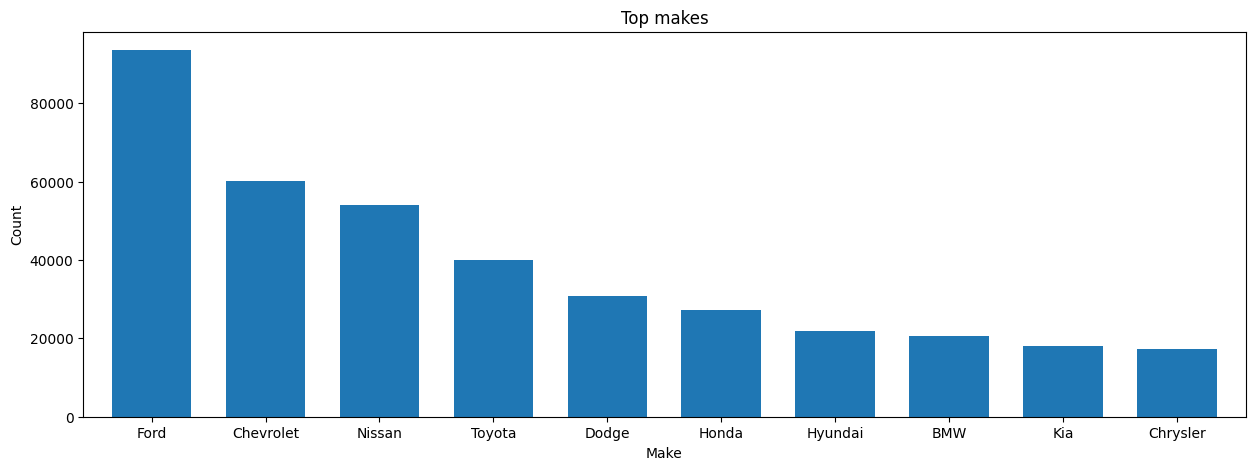

In [ ]:
make_counts = df_cars['make'].value_counts()

top_10_make_counts = make_counts.head(10)

plt.figure(figsize=(15, 5))
top_10_make_counts.plot(kind='bar', width=0.7)
plt.title('Top makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight 1:**\
Brand-brand seperti Ford, Chevrolet, dan Nissan sangat diminati di Amerika dan laku terjual dengan baik.

**Rekomendasi:**\
Dealer dapat fokus pada menyusun komposisi stok unit berdasarkan brand-brand ini dan memperluas penawaran mereka dari brand-brand populer ini.


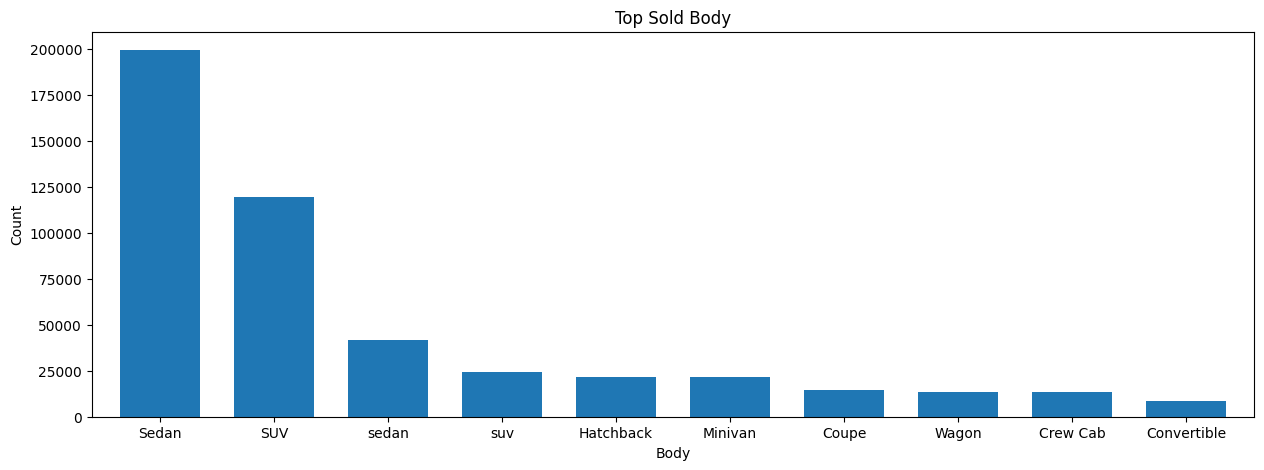

In [ ]:
make_counts = df_cars['body'].value_counts()

top_10_make_counts = make_counts.head(10)

plt.figure(figsize=(15, 5))
top_10_make_counts.plot(kind='bar', width=0.7)
plt.title('Top Sold Body')
plt.xlabel('Body')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight 2:**\
Tipe mobil sedan dan SUV lebih diminati oleh konsumen.

**Rekomendasi:**\
Dealer sebaiknya memprioritaskan pembelian varian sedan dan SUV untuk memenuhi permintaan yang tinggi di pasar.


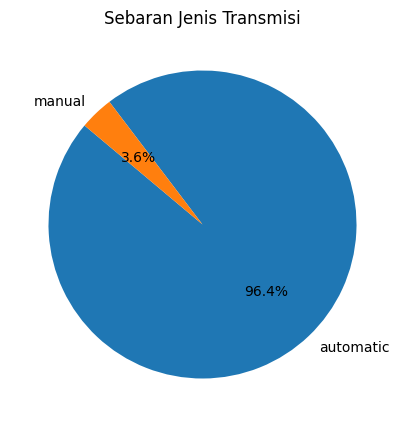

In [ ]:
transmission_counts = df_cars['transmission'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Jenis Transmisi')
plt.show()

**Insight 3:**\
Mobil dengan transmisi otomatis lebih laku terjual.

**Rekomendasi:**\
Dealer harus membeli unit stok dengan transmisi otomatis dalam jumlah yang lebih besar untuk memenuhi permintaan konsumen.


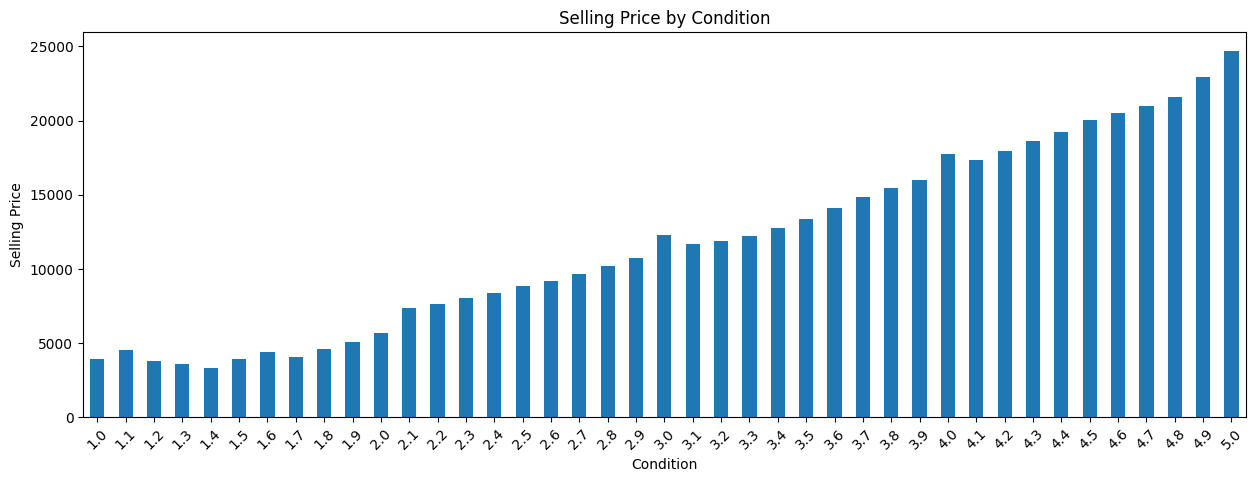

In [ ]:
condition_means = df_cars.groupby('condition')['sellingprice'].mean()

plt.figure(figsize=(15, 5))
condition_means.plot(kind='bar')
plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

**Insight 4:**\
Semakin baik kondisi mobil (rating diatas 3) maka harga belinya juga semakin tinggi sementara unit dengan kondisi buruk (rating dibawah 3) banyak diminati karena harga lebih murah.

**Rekomendasi:**\
Dealer dapat membeli unit dengan kondisi kurang baik dan memperbaikinya sebelum dijual dengan harga yang lebih baik, meningkatkan potensi keuntungan.


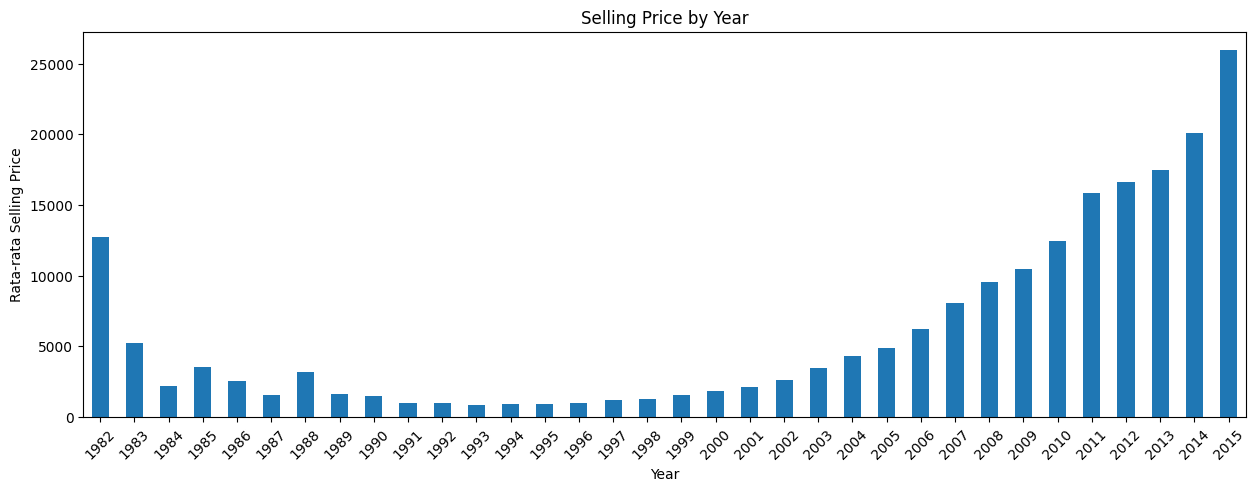

In [ ]:
condition_means = df_cars.groupby('year')['sellingprice'].mean()

plt.figure(figsize=(15, 5))
condition_means.plot(kind='bar')
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Rata-rata Selling Price')
plt.xticks(rotation=45)
plt.show()

**Insight 5:**\
Mobil keluaran tahun 1980an memiliki nilai jual yang lebih tinggi daripada mobil tahun 2000an, kemungkinan karena termasuk dalam kategori mobil antik.

**Rekomendasi:**\
Dealer dapat menawarkan mobil-mobil vintage ini kepada konsumen yang mencari barang antik dan mengidentifikasi mobil-mobil ini dalam stok mereka.


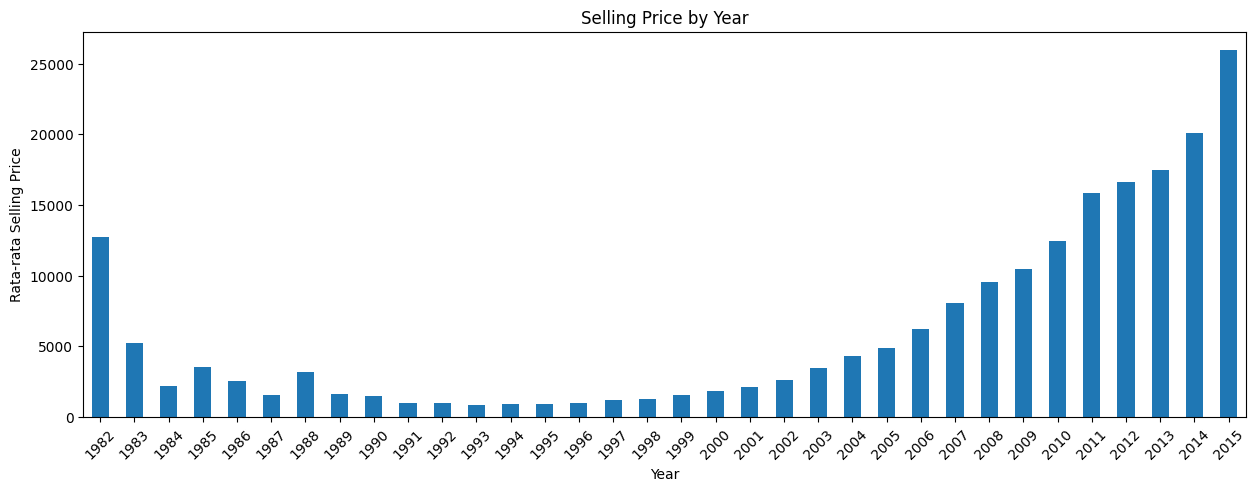

In [ ]:
condition_means = df_cars.groupby('year')['sellingprice'].mean()

plt.figure(figsize=(15, 5))
condition_means.plot(kind='bar')
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Rata-rata Selling Price')
plt.xticks(rotation=45)
plt.show()

**Insight 6:**\
Penjualan mobil terbanyak berdasarkan tahun produksi adalah 2013, 2014, dan 2015, menunjukkan bahwa konsumen lebih suka mobil terbaru.

**Rekomendasi:**\
Dealer dapat fokus pada menjual mobil keluaran terbaru untuk menarik lebih banyak konsumen.


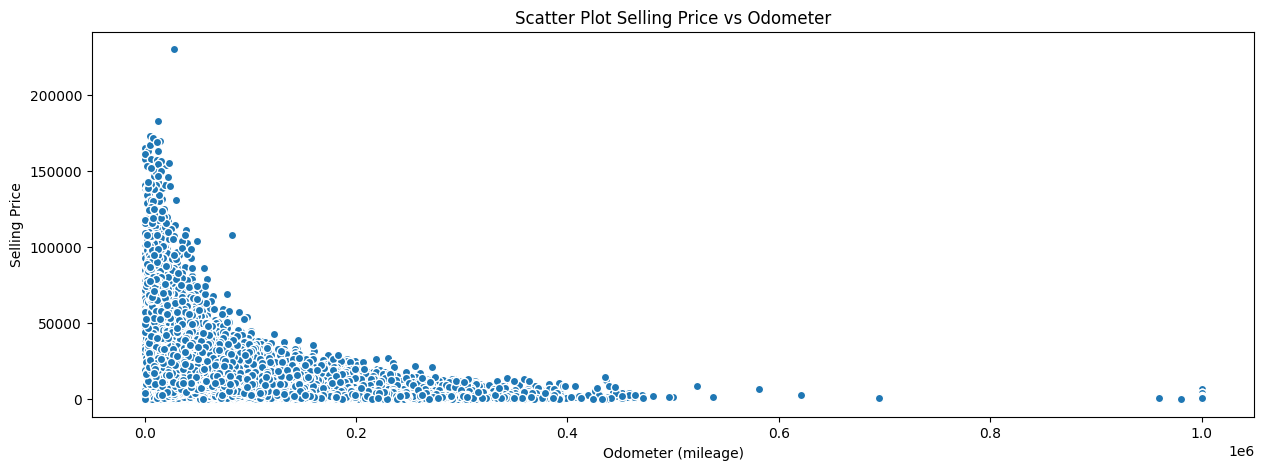

In [ ]:
# Plot scatter plot untuk visualisasi antara 'sellingprice' dan 'odometer' dengan garis putih pada setiap lingkaran
plt.figure(figsize=(15, 5))
plt.scatter(df_cars['odometer'], df_cars['sellingprice'], edgecolor='white')  # Menambahkan garis putih pada setiap marker
plt.title('Scatter Plot Selling Price vs Odometer')
plt.xlabel('Odometer (mileage)')
plt.ylabel('Selling Price')
plt.show()

**Insight 7:**\
Harga jual mobil dipengaruhi oleh beberapa faktor, termasuk odometer, kondisi mobil (nilai rating), dan tahun keluaran.

**Rekomendasi:**\
Dealer harus memperhatikan faktor-faktor ini dalam menentukan harga jual untuk memaksimalkan keuntungan.

# 5. Git